In [ ]:
%pip install imblearn

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


%matplotlib inline

In [16]:
df_origin = pd.read_csv('https://raw.githubusercontent.com/jfelipeo/Proyecto_Analitica_II_Equipo-5/main/ecommerce-data.csv', sep=",")
df_transformed = df_origin.copy()

In [17]:
df_transformed = df_transformed.drop_duplicates()

In [18]:
df_transformed[['OperatingSystems', 'Browser', 'Region', 'TrafficType']] = df_transformed[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object')
df_transformed[['Reviews','Informational','ProductRelated']] = df_transformed[['Reviews','Informational','ProductRelated']].astype('float')

In [19]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reviews                  12205 non-null  float64
 1   Reviews_Duration         12205 non-null  float64
 2   Informational            12205 non-null  float64
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  float64
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

In [21]:
df_transformed=pd.get_dummies(df_transformed)

In [34]:
info_bool = df_transformed.describe(include='bool').transpose()


In [38]:
top_False = info_bool[info_bool['top']== False]
top_True = info_bool[info_bool['top']== True]

In [43]:
top_False.head(50)

,count,unique,top,freq
Weekend,12205,2,False,9346
Purchase,12205,2,False,10297
Month_Aug,12205,2,False,11772
Month_Dec,12205,2,False,10499
Month_Feb,12205,2,False,12024
Month_Jul,12205,2,False,11773
Month_June,12205,2,False,11920
Month_Mar,12205,2,False,10345
Month_May,12205,2,False,8876
Month_Nov,12205,2,False,9223


In [44]:
top_True.head(50)

,count,unique,top,freq
OperatingSystems_2,12205,2,True,6541
Browser_2,12205,2,True,7883
VisitorType_Returning_Visitor,12205,2,True,10431


In [46]:
df_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reviews,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Reviews_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [49]:
# Separación de caracteristicas y target (X , y)
y = df_transformed.Purchase
X = df_transformed.drop(['Purchase'], axis=1)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:",  X_test.shape)

Tamaño del conjunto de entrenamiento: (9764, 74)
Tamaño del conjunto de validación: (2441, 74)


# Modelado: Aplicación de técnicas de ML

## Modelo 1: Regresión Líneal Multiple - sin selección de variables

No es posible, hasta que se realice alguna tecnica de muestreo (ponderacion, o  transformacion de la variable respuesta, aplicar un submuestreo o sobre muestreo)

In [53]:
#Crea el modelo
regr = LinearRegression()

#Calibra el modelo
regr.fit(X_train, y_train)

#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)

#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")

Accuracy (Train): 29.261531007182395%


### Metricas de desempeño

In [54]:
#Metricas de desempeño de entrenamiento

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred))

# R2-adjusted
r2 = r2_score(y_train, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

Mean squared error: 0.09
Mean absolute error: 0.20
R2: 29.26
R2-adjusted: 28.72


In [55]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)

#Exactitud de modelo

print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

#Metricas de desempeño de validación
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_hat))

# R2-adjusted
r2 = r2_score(y_test, y_hat)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

Accuracy (Test): 28.160785710493087%
Mean squared error: 0.09
Mean absolute error: 0.20
R2: 28.16
R2-adjusted: 25.91


# Modelo 2: Random Forest - sin selección de variables

In [57]:
#Crea el modelo
ranfor = RandomForestRegressor(
    n_estimators=150,
    max_depth=20,
    random_state=45
)

#Calibra el modelo
ranfor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=45)

In [58]:
#Predicciones sobre el conjunto de train
y_pred_r = ranfor.predict(X_train)

#Exactitud de modelo
print("Accuracy (Train): "+ str(ranfor.score(X_train,y_train)*100) + "%")

#Metricas de desempeño de entrenamiento
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_r))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_pred_r))
# R2-adjusted
r2 = r2_score(y_train, y_pred_r)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

y_hat_r = ranfor.predict(X_test)

#Exactitud de modelo
print("Accuracy (Test): "+ str(ranfor.score(X_test,y_test)*100) + "%")

#Metricas de desempeño de validación
# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat_r))
#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_hat_r))
# R2-adjusted
r2 = r2_score(y_test, y_hat_r)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

Accuracy (Train): 92.0651610199474%
Mean squared error: 0.01
Mean absolute error: 0.05
R2: 92.07
R2-adjusted: 92.00
Accuracy (Test): 43.82210889627011%
Mean squared error: 0.07
Mean absolute error: 0.14
R2: 43.82
R2-adjusted: 42.07


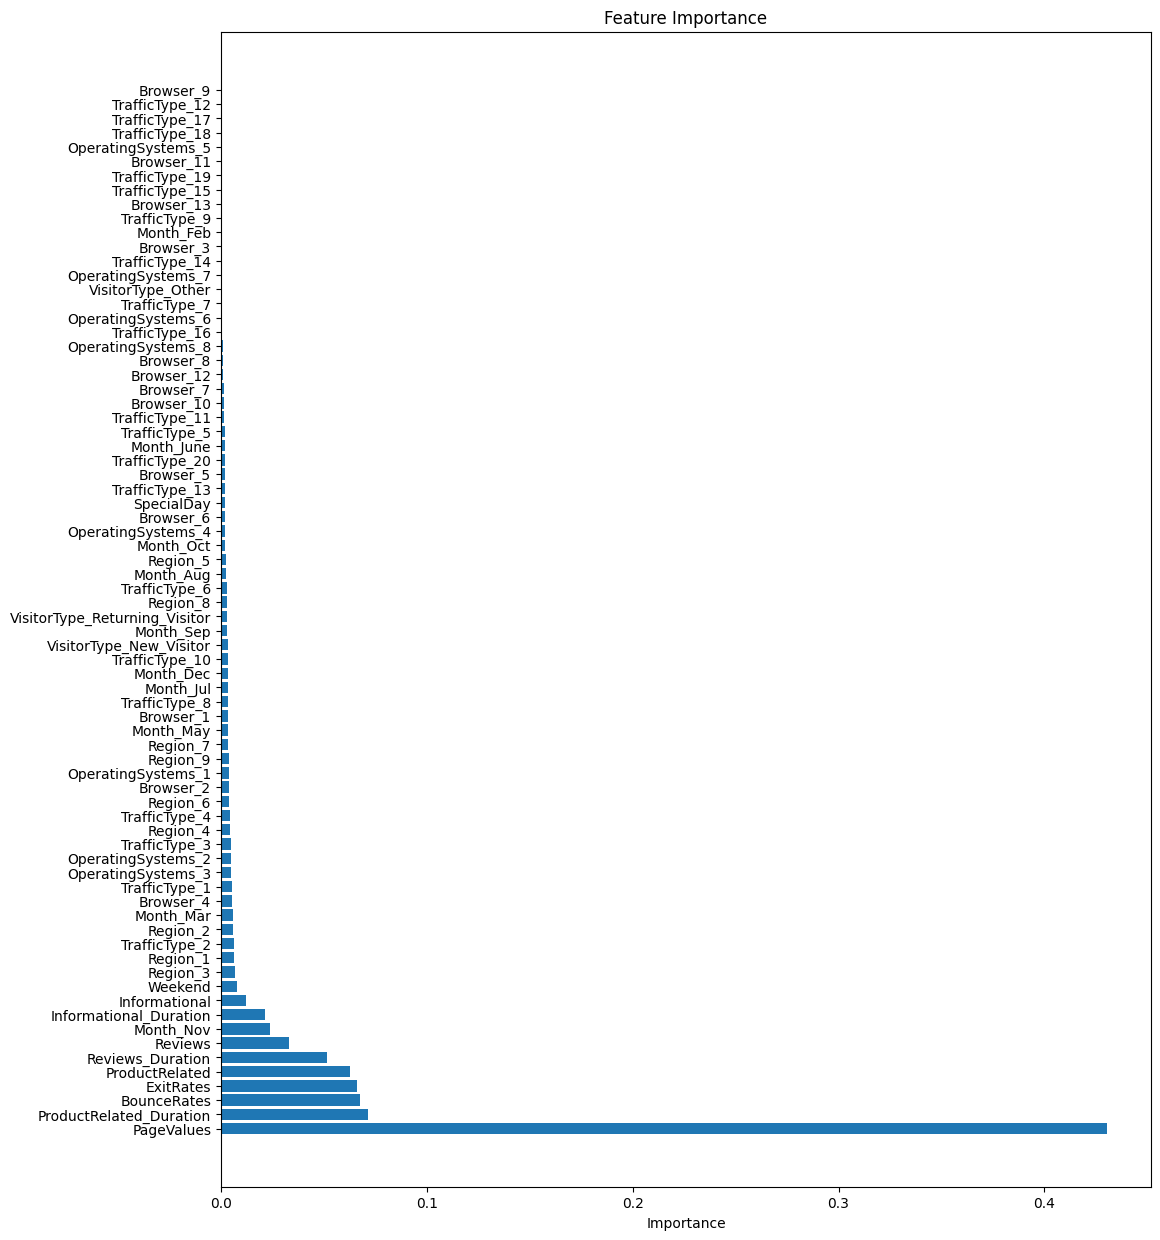

   PageValues  ProductRelated_Duration  BounceRates  ExitRates  \
0         0.0                 0.000000         0.20       0.20   
1         0.0                64.000000         0.00       0.10   
2         0.0                 0.000000         0.20       0.20   
3         0.0                 2.666667         0.05       0.14   
4         0.0               627.500000         0.02       0.05   

   ProductRelated  Reviews_Duration  Reviews  Month_Nov  \
0             1.0               0.0      0.0      False   
1             2.0               0.0      0.0      False   
2             1.0               0.0      0.0      False   
3             2.0               0.0      0.0      False   
4            10.0               0.0      0.0      False   

   Informational_Duration  Informational  Weekend  Region_3  Region_1  \
0                     0.0            0.0    False     False      True   
1                     0.0            0.0    False     False      True   
2                     0.0    

In [81]:
# Importancia de las variables
importance = ranfor.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Seleccionar las características más importantes (por ejemplo, las top 20)
selected_features = importance_df['Feature'].head(20).tolist()

# Crear un nuevo conjunto de datos solo con las características seleccionadas
X_selected = X[selected_features]

# Visualizar los primeros registros del conjunto de datos con características seleccionadas
print(X_selected.head())

# Modelo 3: Regresión Lineal Múltiple - con selección de variables

In [86]:

from sklearn.feature_selection import SelectFromModel
# Seleccionar características importantes
sel_ = SelectFromModel(ranfor, threshold='mean')
sel_.fit(X_train, y_train)



SelectFromModel(estimator=RandomForestRegressor(max_depth=20, n_estimators=150,
                                                random_state=45),
                threshold='mean')

In [88]:
# Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_new_train = sel_.transform(X_train)
X_new_test = sel_.transform(X_test)

In [89]:
#Crea el modelo
regr2 = LinearRegression()
#Calibra el modelo
regr2.fit(X_new_train, y_train)
#Realice predicciones sobre X_new_train
y_pred_r2 = regr2.predict(X_new_train)

#Exactitud de modelo
print("Accuracy (Train): "+ str(regr2.score(X_new_train,y_train)*100) + "%")
#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred_r2)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred_r2)))

# R2-adjusted
r2 = r2_score(y_train, y_pred_r2)
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_new_train.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

#Predicciones sobre el conjunto de test
y_hat_r2 = regr2.predict(X_new_test)
#Exactitud de modelo
print("\nAccuracy (Test): "+ str(regr2.score(X_new_test,y_test)*100) + "%")
#Metricas de desempeño de validación
print("MSE validación: {}".format(mean_squared_error(y_test, y_hat_r2)))
print("MAE validación: {}".format(mean_absolute_error(y_test, y_hat_r2)))

# R2-adjusted
r2 = r2_score(y_test, y_hat_r2)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_new_test.shape[1]-1)
print("R2: %.2f" % (r2*100))
print("R2-adjusted: %.2f" % (adj_r2*100))

Accuracy (Train): 28.212397690539646%
MSE entrenamiento: 0.09486285699814136
MAE entrenamiento: 0.20070097099298465
R2: 28.21
R2-adjusted: 28.15

Accuracy (Test): 27.892446325602517%
MSE validación: 0.09437049452880122
MAE validación: 0.2001138424369797
R2: 27.89
R2-adjusted: 27.63
